## Competição Kaggle

Competição para classificação binária. Oportunidade para explorar vários métodos para identificação e exploração dos dados. 

Metrica de avaliação é área de baixo da curva ROC entre a probabilidade e a observação.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

%matplotlib inline

In [2]:
# Importando dados
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Dimensão e visualização das 5 primeiras linhas
print(df_train.shape)
df_train.head()

(900000, 33)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [4]:
# Dimensão e visualização das 5 primeiras linhas
print(df_test.shape)
df_test.head()

(700000, 32)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [5]:
# Informações
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

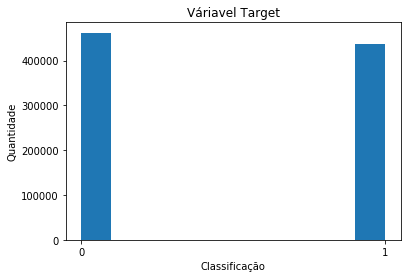

In [6]:
# Histograma da várivael target
plt.hist(df_train['target'])
plt.xticks(df_train['target'].value_counts().index)
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.title('Váriavel Target')
plt.style.use('Solarize_Light2');

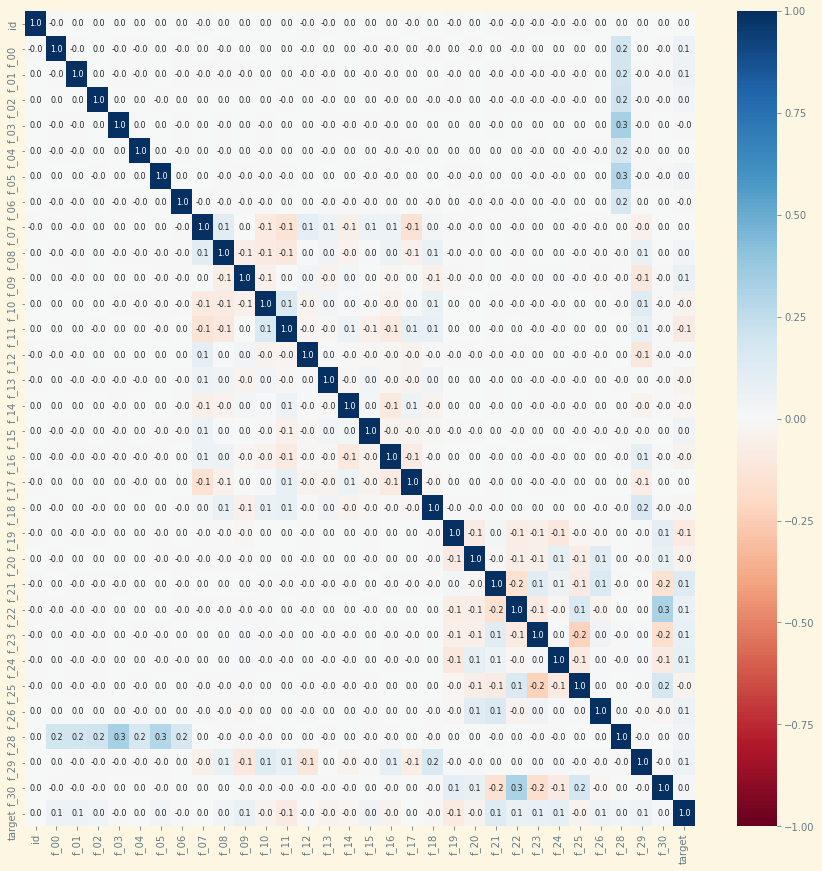

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), vmax=1, vmin=-1, cmap="RdBu",annot=True , annot_kws={'fontsize':8}, fmt='.1f')

Nenhuma correlação interessante com a váriavel target e nem entre váriaveis preditoras. 

In [8]:
# Valores missing
df_train.isnull().sum().sum()

0

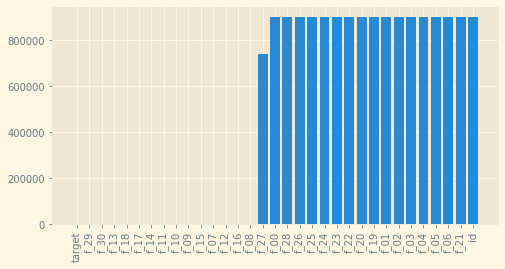

In [9]:
# Gráfico de diferentes valores na váriavel 
plt.figure(figsize=(8,4))
plt.bar(x=df_train.nunique().sort_values().index,height=df_train.nunique().sort_values().values)
plt.xticks(rotation='vertical');

Tem váriavel com baixissimo valores diferentes, assumindo que sejam váriavel categórica e o restante como váriavel númerica. 

f_27 tem alto valores distintos e é do tipo object.

In [10]:
# Separando o dataframe
df_train_x = df_train.drop(['target','id','f_27'], axis=1)
df_train_y = df_train['target']
df_test_x = df_test.drop(['id','f_27'], axis=1)
id_test = df_test['id']

In [11]:
# Lista de váriaveis categóricas e númericas
col_cate= []
col_num= []

for i in df_train_x.columns:
    
    if df_train_x[i].nunique() > 1000:
        col_num.append(i)
    else:
        col_cate.append(i)

In [12]:
# Instanciando algoritmo
one_hot = OneHotEncoder()

# Treino e transformação
one_hot.fit(df_train_x[col_cate])
array_one_hot_treino = one_hot.transform(df_train_x[col_cate]).toarray()

# Nomes das colunas criadas
columns_one_hot = one_hot.get_feature_names(col_cate)

# Transformando o array em dataframe
df_one_hot_treino = pd.DataFrame(data=array_one_hot_treino, columns=columns_one_hot)

# 3 primeiras linhas
df_one_hot_treino.head(3)

,f_07_0,f_07_1,f_07_2,f_07_3,f_07_4,f_07_5,f_07_6,f_07_7,f_07_8,f_07_9,...,f_18_9,f_18_10,f_18_11,f_18_12,f_18_13,f_29_0,f_29_1,f_30_0,f_30_1,f_30_2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
# Instanciando algoritmo
one_hot_2 = OneHotEncoder()

# Treino e transformação
one_hot_2.fit(df_test_x[col_cate])
array_one_hot_teste = one_hot_2.transform(df_test_x[col_cate]).toarray()

# Nomes das colunas criadas
columns_one_hot_teste = one_hot_2.get_feature_names(col_cate)

# Transformando o array em dataframe
df_one_hot_teste = pd.DataFrame(data=array_one_hot_teste, columns=columns_one_hot_teste)

# 3 primeiras linhas
df_one_hot_teste.head(3)

,f_07_0,f_07_1,f_07_2,f_07_3,f_07_4,f_07_5,f_07_6,f_07_7,f_07_8,f_07_9,...,f_18_9,f_18_10,f_18_11,f_18_12,f_18_13,f_29_0,f_29_1,f_30_0,f_30_1,f_30_2
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
# Concatenação entre as colunas novas e colunas númericas, e remoção das colunas categóriucas antigas
df_total_treino_x = pd.concat([df_train_x, df_one_hot_treino], axis=1).drop(col_cate, axis=1)
df_total_teste_x = pd.concat([df_test_x, df_one_hot_teste], axis=1).drop(col_cate, axis=1)

df_total_treino_x.head(3)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,...,f_18_9,f_18_10,f_18_11,f_18_12,f_18_13,f_29_0,f_29_1,f_30_0,f_30_1,f_30_2
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,0.298218,-0.919717,3.058541,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,-3.147667,-1.075434,2.179050,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,2.820733,-3.485342,-0.784235,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
# Colunas que estão dataframe de treino mas não estão no dataframe de teste
list_col_nao_repetidas1 = [i for i in df_total_treino_x.columns if i not in df_total_teste_x.columns]

print(f'Colunas no qual nao tem repeticão: {list_col_nao_repetidas1}')

Colunas no qual nao tem repeticão: ['f_07_14', 'f_08_14', 'f_08_16', 'f_12_16', 'f_14_14', 'f_15_13', 'f_16_14', 'f_16_15', 'f_17_14']


In [16]:
# Colunas que estão dataframe de teste mas não estão no dataframe de treino
list_col_nao_repetidas2 = [i for i in df_total_teste_x.columns if i not in df_total_treino_x.columns]

print(f'Colunas no qual nao tem repeticão: {list_col_nao_repetidas2}')

Colunas no qual nao tem repeticão: ['f_07_16', 'f_09_16', 'f_10_15', 'f_11_14', 'f_12_15', 'f_13_13', 'f_17_13']


In [17]:
# Drop das colunas
df_total_treino_x.drop(list_col_nao_repetidas1, axis=1, inplace=True)
df_total_teste_x.drop(list_col_nao_repetidas2, axis=1, inplace=True)

print(f'shape dataframe treino: {df_total_treino_x.shape}')
print(f'shape dataframe teste: {df_total_teste_x.shape}')

shape dataframe treino: (900000, 190)
shape dataframe teste: (700000, 190)


In [46]:
# Dividindo dados em treino e validação
x_train, x_val, y_train, y_val = train_test_split(df_total_treino_x, df_train_y, test_size=.1, random_state=2)

In [61]:
model_logistic = LogisticRegression()

model_logistic.fit(x_train, y_train)
predict_logistic = model_logistic.predict_proba(x_val)[:,1]
    
score_roc = roc_auc_score(y_val, predict_logistic)

print(f'Valor da curva roc: {score_roc}\n')

Valor da curva roc: 0.6633804252874284



In [64]:
model_forest = RandomForestClassifier(max_features=5, n_estimators=10)

model_forest.fit(x_train, y_train)
predict_forest = model_forest.predict_proba(x_val)[:,1]
    
score_roc = roc_auc_score(y_val, predict_forest)

print(f'Valor da curva roc: {score_roc}\n')

Valor da curva roc: 0.7121411062017237



In [65]:
model_cat = CatBoostClassifier()

model_cat.fit(x_train, y_train)
predict_cat = model_cat.predict_proba(x_val)[:,1]
    
score_roc = roc_auc_score(y_val, predict_cat)

print(f'Valor da curva roc: {score_roc}\n')

Learning rate set to 0.179828
0:	learn: 0.6837913	total: 544ms	remaining: 9m 3s
1:	learn: 0.6704060	total: 873ms	remaining: 7m 15s
2:	learn: 0.6618903	total: 1.3s	remaining: 7m 13s
3:	learn: 0.6492758	total: 1.74s	remaining: 7m 12s
4:	learn: 0.6347520	total: 2.15s	remaining: 7m 7s
5:	learn: 0.6304979	total: 2.46s	remaining: 6m 47s
6:	learn: 0.6226760	total: 2.77s	remaining: 6m 32s
7:	learn: 0.6167745	total: 3.05s	remaining: 6m 18s
8:	learn: 0.6105433	total: 3.33s	remaining: 6m 6s
9:	learn: 0.6030834	total: 3.65s	remaining: 6m 1s
10:	learn: 0.5999713	total: 3.91s	remaining: 5m 51s
11:	learn: 0.5937073	total: 4.19s	remaining: 5m 44s
12:	learn: 0.5874416	total: 4.5s	remaining: 5m 41s
13:	learn: 0.5828994	total: 4.95s	remaining: 5m 48s
14:	learn: 0.5793590	total: 5.35s	remaining: 5m 51s
15:	learn: 0.5760440	total: 5.74s	remaining: 5m 53s
16:	learn: 0.5699385	total: 6.17s	remaining: 5m 57s
17:	learn: 0.5674531	total: 6.51s	remaining: 5m 55s
18:	learn: 0.5650790	total: 6.91s	remaining: 5m 56

158:	learn: 0.4191780	total: 1m 1s	remaining: 5m 23s
159:	learn: 0.4188290	total: 1m 1s	remaining: 5m 23s
160:	learn: 0.4181731	total: 1m 1s	remaining: 5m 22s
161:	learn: 0.4179341	total: 1m 2s	remaining: 5m 22s
162:	learn: 0.4176027	total: 1m 2s	remaining: 5m 22s
163:	learn: 0.4173321	total: 1m 3s	remaining: 5m 21s
164:	learn: 0.4171101	total: 1m 3s	remaining: 5m 20s
165:	learn: 0.4167684	total: 1m 3s	remaining: 5m 19s
166:	learn: 0.4164718	total: 1m 3s	remaining: 5m 19s
167:	learn: 0.4162206	total: 1m 4s	remaining: 5m 18s
168:	learn: 0.4160827	total: 1m 4s	remaining: 5m 17s
169:	learn: 0.4158286	total: 1m 4s	remaining: 5m 17s
170:	learn: 0.4156169	total: 1m 5s	remaining: 5m 16s
171:	learn: 0.4154282	total: 1m 5s	remaining: 5m 15s
172:	learn: 0.4147312	total: 1m 5s	remaining: 5m 15s
173:	learn: 0.4142404	total: 1m 6s	remaining: 5m 14s
174:	learn: 0.4139728	total: 1m 6s	remaining: 5m 14s
175:	learn: 0.4137977	total: 1m 6s	remaining: 5m 13s
176:	learn: 0.4135385	total: 1m 7s	remaining: 

311:	learn: 0.3825086	total: 2m	remaining: 4m 26s
312:	learn: 0.3823848	total: 2m 1s	remaining: 4m 25s
313:	learn: 0.3822079	total: 2m 1s	remaining: 4m 25s
314:	learn: 0.3819364	total: 2m 1s	remaining: 4m 25s
315:	learn: 0.3817722	total: 2m 2s	remaining: 4m 24s
316:	learn: 0.3816487	total: 2m 2s	remaining: 4m 24s
317:	learn: 0.3815655	total: 2m 3s	remaining: 4m 23s
318:	learn: 0.3813017	total: 2m 3s	remaining: 4m 23s
319:	learn: 0.3812490	total: 2m 3s	remaining: 4m 23s
320:	learn: 0.3810652	total: 2m 4s	remaining: 4m 22s
321:	learn: 0.3808460	total: 2m 4s	remaining: 4m 22s
322:	learn: 0.3807768	total: 2m 5s	remaining: 4m 21s
323:	learn: 0.3805239	total: 2m 5s	remaining: 4m 21s
324:	learn: 0.3804286	total: 2m 5s	remaining: 4m 21s
325:	learn: 0.3803746	total: 2m 6s	remaining: 4m 21s
326:	learn: 0.3803062	total: 2m 6s	remaining: 4m 20s
327:	learn: 0.3801812	total: 2m 7s	remaining: 4m 20s
328:	learn: 0.3799675	total: 2m 7s	remaining: 4m 19s
329:	learn: 0.3797853	total: 2m 7s	remaining: 4m 

465:	learn: 0.3628746	total: 3m 2s	remaining: 3m 29s
466:	learn: 0.3628002	total: 3m 2s	remaining: 3m 28s
467:	learn: 0.3626861	total: 3m 3s	remaining: 3m 28s
468:	learn: 0.3625448	total: 3m 3s	remaining: 3m 27s
469:	learn: 0.3625061	total: 3m 3s	remaining: 3m 27s
470:	learn: 0.3624287	total: 3m 4s	remaining: 3m 26s
471:	learn: 0.3622929	total: 3m 4s	remaining: 3m 26s
472:	learn: 0.3622114	total: 3m 4s	remaining: 3m 26s
473:	learn: 0.3621223	total: 3m 5s	remaining: 3m 25s
474:	learn: 0.3620415	total: 3m 5s	remaining: 3m 25s
475:	learn: 0.3619431	total: 3m 6s	remaining: 3m 24s
476:	learn: 0.3618199	total: 3m 6s	remaining: 3m 24s
477:	learn: 0.3617749	total: 3m 7s	remaining: 3m 24s
478:	learn: 0.3616360	total: 3m 8s	remaining: 3m 24s
479:	learn: 0.3615410	total: 3m 8s	remaining: 3m 24s
480:	learn: 0.3614843	total: 3m 9s	remaining: 3m 24s
481:	learn: 0.3614115	total: 3m 10s	remaining: 3m 24s
482:	learn: 0.3613633	total: 3m 10s	remaining: 3m 24s
483:	learn: 0.3612444	total: 3m 11s	remainin

618:	learn: 0.3500623	total: 4m 4s	remaining: 2m 30s
619:	learn: 0.3498951	total: 4m 4s	remaining: 2m 29s
620:	learn: 0.3498416	total: 4m 4s	remaining: 2m 29s
621:	learn: 0.3497744	total: 4m 5s	remaining: 2m 29s
622:	learn: 0.3495977	total: 4m 5s	remaining: 2m 28s
623:	learn: 0.3495587	total: 4m 6s	remaining: 2m 28s
624:	learn: 0.3493464	total: 4m 6s	remaining: 2m 27s
625:	learn: 0.3493091	total: 4m 6s	remaining: 2m 27s
626:	learn: 0.3492655	total: 4m 7s	remaining: 2m 27s
627:	learn: 0.3492330	total: 4m 8s	remaining: 2m 27s
628:	learn: 0.3491544	total: 4m 8s	remaining: 2m 26s
629:	learn: 0.3490772	total: 4m 8s	remaining: 2m 26s
630:	learn: 0.3489463	total: 4m 9s	remaining: 2m 25s
631:	learn: 0.3488118	total: 4m 9s	remaining: 2m 25s
632:	learn: 0.3487789	total: 4m 10s	remaining: 2m 25s
633:	learn: 0.3486047	total: 4m 10s	remaining: 2m 24s
634:	learn: 0.3485068	total: 4m 11s	remaining: 2m 24s
635:	learn: 0.3484264	total: 4m 11s	remaining: 2m 23s
636:	learn: 0.3483679	total: 4m 11s	remain

771:	learn: 0.3400681	total: 5m 4s	remaining: 1m 30s
772:	learn: 0.3400006	total: 5m 5s	remaining: 1m 29s
773:	learn: 0.3399507	total: 5m 5s	remaining: 1m 29s
774:	learn: 0.3399192	total: 5m 6s	remaining: 1m 28s
775:	learn: 0.3398276	total: 5m 6s	remaining: 1m 28s
776:	learn: 0.3396794	total: 5m 6s	remaining: 1m 28s
777:	learn: 0.3396066	total: 5m 7s	remaining: 1m 27s
778:	learn: 0.3395572	total: 5m 7s	remaining: 1m 27s
779:	learn: 0.3394942	total: 5m 7s	remaining: 1m 26s
780:	learn: 0.3393423	total: 5m 8s	remaining: 1m 26s
781:	learn: 0.3392649	total: 5m 8s	remaining: 1m 26s
782:	learn: 0.3392342	total: 5m 9s	remaining: 1m 25s
783:	learn: 0.3391687	total: 5m 9s	remaining: 1m 25s
784:	learn: 0.3390991	total: 5m 10s	remaining: 1m 24s
785:	learn: 0.3390371	total: 5m 10s	remaining: 1m 24s
786:	learn: 0.3390088	total: 5m 10s	remaining: 1m 24s
787:	learn: 0.3389133	total: 5m 11s	remaining: 1m 23s
788:	learn: 0.3388132	total: 5m 11s	remaining: 1m 23s
789:	learn: 0.3387632	total: 5m 12s	remai

926:	learn: 0.3319880	total: 6m 4s	remaining: 28.7s
927:	learn: 0.3319474	total: 6m 4s	remaining: 28.3s
928:	learn: 0.3319225	total: 6m 4s	remaining: 27.9s
929:	learn: 0.3318870	total: 6m 5s	remaining: 27.5s
930:	learn: 0.3318555	total: 6m 5s	remaining: 27.1s
931:	learn: 0.3318270	total: 6m 6s	remaining: 26.7s
932:	learn: 0.3317785	total: 6m 6s	remaining: 26.3s
933:	learn: 0.3317476	total: 6m 7s	remaining: 25.9s
934:	learn: 0.3317256	total: 6m 7s	remaining: 25.5s
935:	learn: 0.3316974	total: 6m 7s	remaining: 25.2s
936:	learn: 0.3316752	total: 6m 8s	remaining: 24.8s
937:	learn: 0.3316671	total: 6m 8s	remaining: 24.4s
938:	learn: 0.3316527	total: 6m 9s	remaining: 24s
939:	learn: 0.3316048	total: 6m 9s	remaining: 23.6s
940:	learn: 0.3315599	total: 6m 9s	remaining: 23.2s
941:	learn: 0.3314707	total: 6m 10s	remaining: 22.8s
942:	learn: 0.3314289	total: 6m 10s	remaining: 22.4s
943:	learn: 0.3314020	total: 6m 10s	remaining: 22s
944:	learn: 0.3313631	total: 6m 11s	remaining: 21.6s
945:	learn: 

In [66]:
model_xbg = XGBClassifier()

model_xbg.fit(x_train, y_train)
predict_xgb = model_xbg.predict_proba(x_val)[:,1]
    
score_roc = roc_auc_score(y_val, predict_xgb)

print(f'Valor da curva roc: {score_roc}\n')

Valor da curva roc: 0.9131623222596492



In [59]:
for k in range(5,191,5):
    
    k_best = SelectKBest(score_func=f_classif, k=k)

    k_best.fit(x_train, y_train)
    
    x_best = k_best.transform(x_train)
    x_val_best = k_best.transform(x_val)
    
    model_logistic = LogisticRegression()

    model_logistic.fit(x_best, y_train)
    predict_logistic = model_logistic.predict_proba(x_val_best)[:,1]
    
    score_roc = roc_auc_score(y_val, predict_logistic)
    
    print(f'\nValor de k: {k}, valor da curva roc: {score_roc}\n')
    print('*'*50)


Valor de k: 5, valor da curva roc: 0.6186616524530681
**************************************************

Valor de k: 10, valor da curva roc: 0.6364435645309139
**************************************************

Valor de k: 15, valor da curva roc: 0.6447662554354949
**************************************************

Valor de k: 20, valor da curva roc: 0.6471477228489654
**************************************************

Valor de k: 25, valor da curva roc: 0.6499376301945956
**************************************************

Valor de k: 30, valor da curva roc: 0.6536780587985407
**************************************************

Valor de k: 35, valor da curva roc: 0.65463759510258
**************************************************

Valor de k: 40, valor da curva roc: 0.6580641782543137
**************************************************

Valor de k: 45, valor da curva roc: 0.6581120613264815
**************************************************

Valor de k: 50, valor da curva roc: 0.6

In [74]:
predict_cat_teste = model_cat.predict_proba(df_total_teste_x)[:,1]

In [22]:
model_logistic = LogisticRegression()

model_logistic.fit(df_total_treino_x, df_train_y)
predict_logistic = model_logistic.predict_proba(df_total_teste_x)

C:\Users\Alvim Serrao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
resposta = pd.DataFrame(id_test, columns=['id'])
resposta['target'] = predict_cat_teste

In [76]:
resposta.to_csv('resposta3.csv', index=False)

Primeira submission, bem simples e utilizar como baseline

submission1 = 0,65

-----------------------------------------------------
Segunda susmission - One hot encoder nas váriaveis categóricas apenas

submission2 = 0,66

-----------------------------------------------------
Terceira submission - Utilizando algoritmo catboost

submission3 = 0,93